In [1]:
from main_resnet import KeyClf, KeyStrokeClsDataset, KeyClsData,\
      DATA_DIR, IMG_SIZE, FRAMES_PER_VIDEO, NUM_CLASSES, LEARNING_RATE, BATCH_SIZE
import torch
import torchmetrics
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import math
from functools import partial
import pathlib
import torch
# from GesRec.models.resnet import resnet101
from torch.utils.data import DataLoader, Dataset
from torchvision.io import read_video
import lightning as L
from lightning.pytorch.loggers import CSVLogger
import torchmetrics
from lightning.pytorch.callbacks import EarlyStopping


id2Label = ['BackSpace', 'Comma', 'Space', 'Stop', 
            'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 
            'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 
            'y', 'z']

data = KeyClsData(batch_size=BATCH_SIZE, data_dir=DATA_DIR)
model = KeyClf.load_from_checkpoint(
            "./epoch=27-step=41160.ckpt",
            img_size=IMG_SIZE, 
            frames_per_video=FRAMES_PER_VIDEO,
            num_classes=NUM_CLASSES, 
            learning_rate=LEARNING_RATE,
            weights = data.weights)

logger = CSVLogger("test_logs", name=f"resnet")
trainer = L.Trainer(logger=logger, accelerator='cpu', fast_dev_run=False)
trainer.test(model, data)

/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


class_labels:  ['BackSpace', 'Comma', 'Space', 'Stop', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
class_weights:  [0.3786203010544957, 3.4687315634218288, 0.23390521656969515, 5.157456140350877, 0.535290770456356, 2.7603286384976524, 1.2979028697571744, 1.3481226712525078, 0.35877955758962626, 2.4195473251028807, 2.2689821514712976, 1.350445018662073, 0.5581583007001305, 4.544541062801932, 5.332879818594105, 0.9848408710217755, 1.8958484482063684, 0.6643502824858757, 0.6276487856952229, 1.7267254038179147, 5.619593787335723, 0.6949763593380615, 0.8534930139720559, 0.5532345330510469, 1.1135416666666667, 4.180977777777778, 2.9921119592875316, 3.637741686001547, 2.1389722601182357, 4.040893470790378]


/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.3.1, which is newer than your current Lightning version: v2.3.0
/Users/haily/Documents/GitHub/Research Learning/main_resnet.py:193: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  m.weight = nn.init.kaiming_normal(m.weight, mode='fan_out')
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Test dataset: 4489


/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Testing DataLoader 0: 100%|██████████| 1123/1123 [06:23<00:00,  2.93it/s]
preds.shape:  torch.Size([4489, 30])
acc:  tensor(0.1851)
target tensor([21, 21, 21, 21, 21])
preds tensor([21, 21,  8, 23,  9])
              precision    recall  f1-score   support

           0       0.92      0.09      0.16       400
           1       0.05      0.37      0.09        27
           2       0.69      0.40      0.51       618
           3       0.00      0.00      0.00        44
           4       0.00      0.00      0.00       287
           5       0.38      0.65      0.48        26
           6       0.00      0.00      0.00       133
           7       0.19      0.04      0.06       107
           8       0.05      0.05      0.05       425
           9       0.03      0.36      0.05        58
          10       0.50      0.01      0.03        78
          11       0.00      0.00      0.00        90
          12       0.81      0.10      0.18       301
          13       0.00      0.00      0

/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.18511918187141418    │
│         test_loss         │    3.3343400955200195     │
└───────────────────────────┴───────────────────────────┘

[{'test_acc': 0.18511918187141418, 'test_loss': 3.3343400955200195}]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

print(classification_report(y, predictions))

              precision    recall  f1-score   support

   BackSpace       0.92      0.09      0.16       400
       Comma       0.05      0.37      0.09        27
       Space       0.69      0.40      0.51       618
        Stop       0.00      0.00      0.00        44
           a       0.00      0.00      0.00       287
           b       0.38      0.65      0.48        26
           c       0.00      0.00      0.00       133
           d       0.19      0.04      0.06       107
           e       0.05      0.05      0.05       425
           f       0.03      0.36      0.05        58
           g       0.50      0.01      0.03        78
           h       0.00      0.00      0.00        90
           i       0.81      0.10      0.18       301
           j       0.00      0.00      0.00         8
           k       0.07      0.64      0.13        25
           l       0.07      0.17      0.10       121
           m       0.00      0.00      0.00       103
           n       0.53    

/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

              precision    recall  f1-score   support

   BackSpace       0.92      0.09      0.16       400
       Comma       0.05      0.37      0.09        27
       Space       0.69      0.40      0.51       618
        Stop       0.00      0.00      0.00        44
           a       0.00      0.00      0.00       287
           b       0.38      0.65      0.48        26
           c       0.00      0.00      0.00       133
           d       0.19      0.04      0.06       107
           e       0.05      0.05      0.05       425
           f       0.03      0.36      0.05        58
           g       0.50      0.01      0.03        78
           h       0.00      0.00      0.00        90
           i       0.81      0.10      0.18       301
           j       0.00      0.00      0.00         8
           k       0.07      0.64      0.13        25
           l       0.07      0.17      0.10       121
           m       0.00      0.00      0.00       103
           n       0.53    

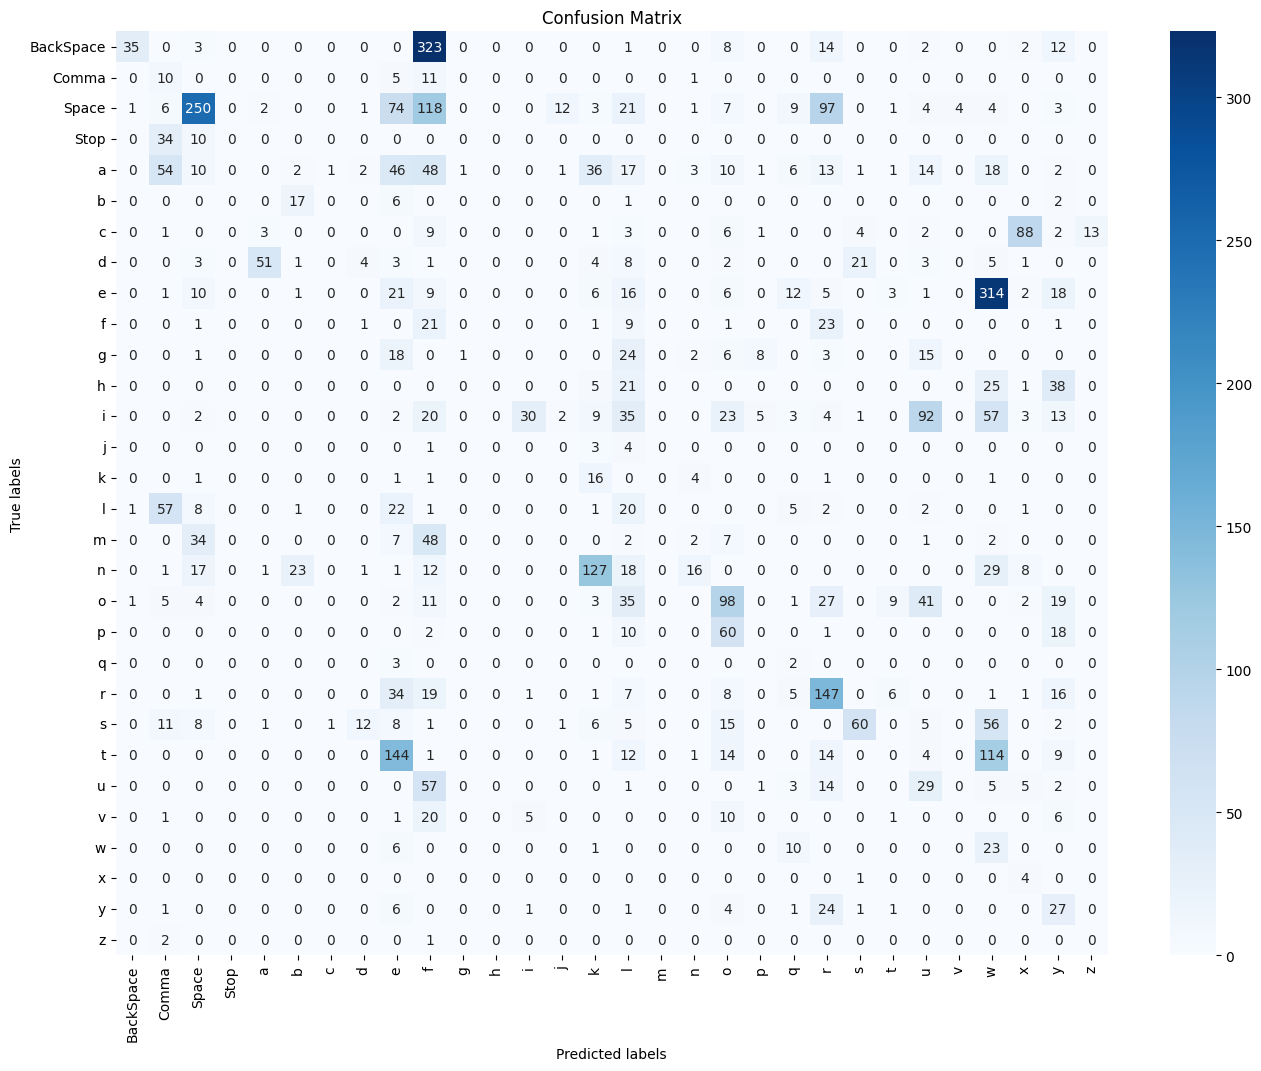

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

print(classification_report(y, predictions))

# Create confusion matrix
cm = confusion_matrix(y, predictions)

# Plot confusion matrix
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=id2Label, yticklabels=id2Label)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
